In [1]:
import os

In [180]:
#import dependencies

#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machinelearning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

train=pd.read_csv("../desktop/train.csv")
test=pd.read_csv("../desktop/test.csv")
gender_submission = pd.read_csv('../desktop/gender_submission.csv')


In [181]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
train.shape

(891, 12)

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
test.shape

(418, 11)

In [32]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
gender_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [34]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [35]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

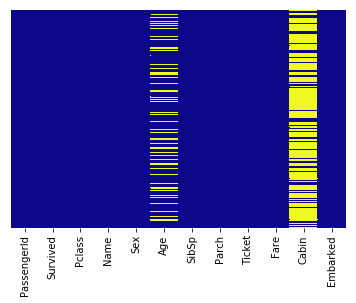

In [55]:
sns.heatmap(train.isnull(),cmap='plasma',cbar=False,yticklabels=False)

In [56]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

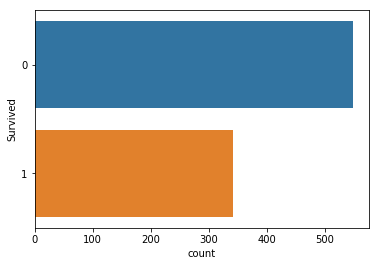

In [57]:
sns.countplot(y='Survived',data=train)

In [58]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


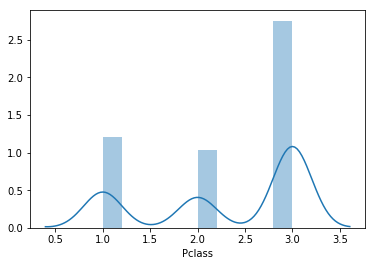

In [59]:
sns.distplot(train.Pclass)

In [60]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

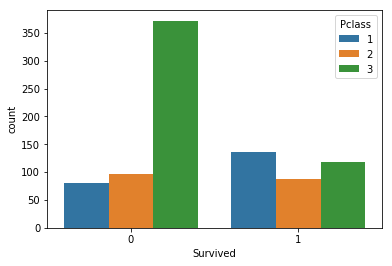

In [64]:
sns.countplot(x='Survived',hue='Pclass',data=train)

In [71]:
train.Name.describe()

count                                 891
unique                                891
top       Fischer, Mr. Eberhard Thelander
freq                                    1
Name: Name, dtype: object

In [76]:
train.Name.value_counts().sum()


891

In [79]:
train.Name.value_counts().unique()

array([1])

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

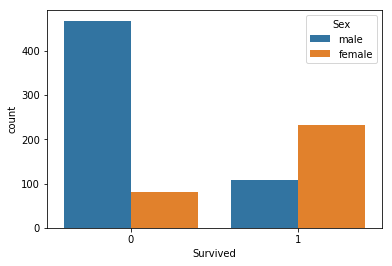

In [86]:
sns.countplot(x='Survived', hue='Sex',data=train)

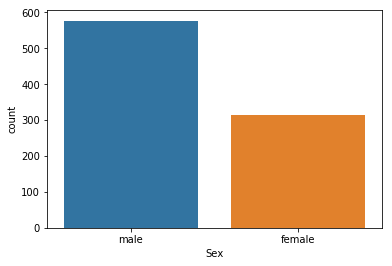

In [87]:
sns.countplot(x='Sex',data=train)

In [89]:
train.Sex.isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [91]:
train.shape

(891, 12)

In [93]:
pd.crosstab(train.Pclass,train.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,62.0,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0
Pclass,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,0,1,0,...,3,1,2,2,0,1,0,2,0,1
2,0,1,0,2,0,2,2,3,2,1,...,1,0,0,0,1,1,0,0,0,0
3,1,0,2,0,0,5,7,3,7,3,...,0,1,0,1,0,0,1,0,1,0


In [94]:
pd.crosstab(train.Pclass,train.Sex)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [95]:
pd.crosstab(train.Pclass,train.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


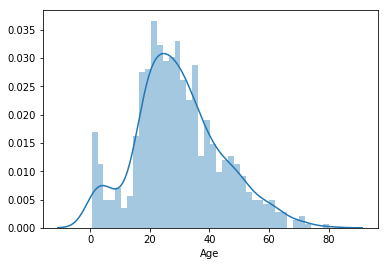

In [102]:
sns.distplot(train.Age.dropna(),kde=True, bins=40)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [105]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [108]:
train.SibSp.isnull().sum()

0

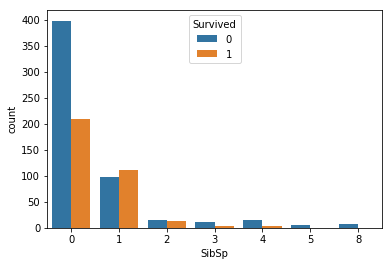

In [115]:
sns.countplot(x='SibSp',hue='Survived',data=train)

In [111]:
pd.crosstab(train.Pclass,train.SibSp)

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


In [112]:
pd.crosstab(train.Survived,train.SibSp)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [113]:
pd.crosstab(train.Sex,train.SibSp)

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,174,106,13,11,6,1,3
male,434,103,15,5,12,4,4


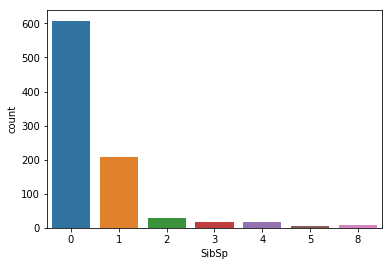

In [116]:
sns.countplot(x='SibSp',data=train)

In [117]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
train.Parch.value_counts().sum()

891

In [121]:
train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

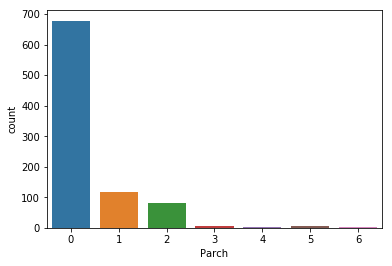

In [122]:
sns.countplot(x='Parch',data=train)

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


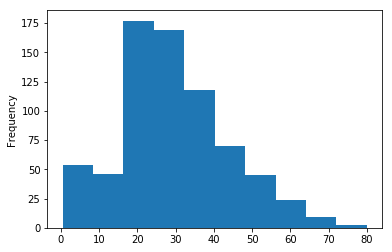

In [124]:
train.Age.plot.hist()

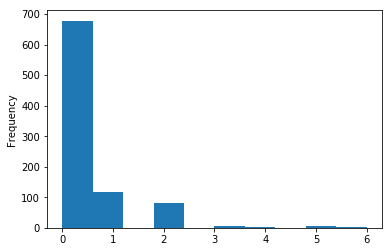

In [125]:
train.Parch.plot.hist()

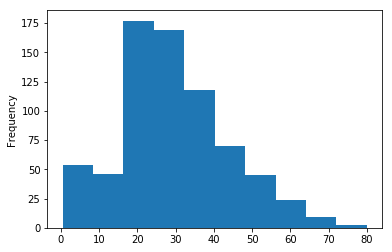

In [128]:
train.Age.plot.hist()

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
train.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [138]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [140]:
train.Ticket.nunique()

681

In [142]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

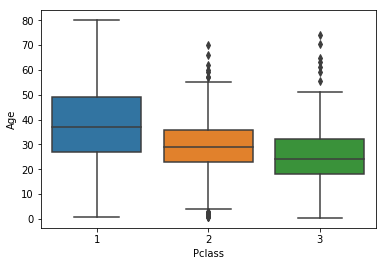

In [143]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [144]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [145]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [146]:
train.Fare.nunique()

248

In [147]:
train.Fare.count()

891

In [148]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

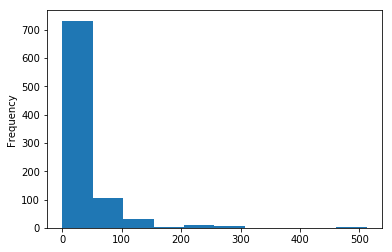

In [150]:
train.Fare.plot.hist()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


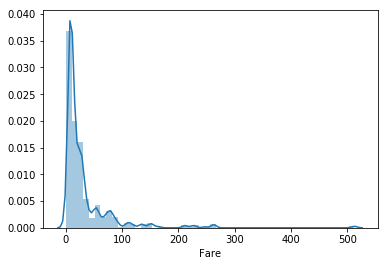

In [151]:
sns.distplot(train.Fare)

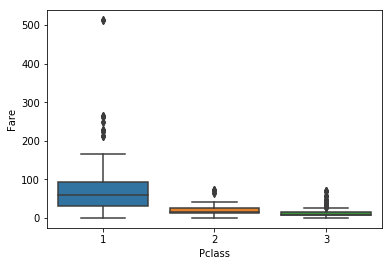

In [154]:
sns.boxplot(x='Pclass',y='Fare',data=train)

In [157]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
train.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [165]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [166]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

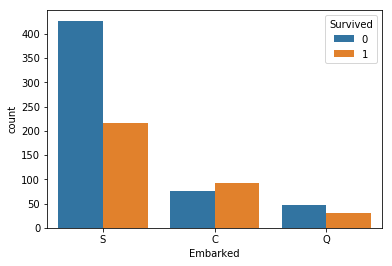

In [170]:
sns.countplot(x='Embarked',hue='Survived',data=train)

In [176]:
train.Embarked.isnull().sum()

2

In [177]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [186]:
train.SibSp.nunique()

7

In [187]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [188]:
train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [192]:
train.SibSp.isnull().sum()

0

In [204]:
train.Fare.nunique()

248

In [205]:
data=pd.DataFrame()

In [206]:
data['Survived']=train.Survived

In [207]:
data['Pclass']=train.Pclass

In [208]:
data['Sex']=train.Sex

In [209]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
data['SibSp']=train.SibSp

In [211]:
data['Parch']=train.Parch

In [212]:
data['Fare']=train.Fare

In [213]:
data['Embarked']=train.Embarked

In [214]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [215]:
data['Embarked']=data['Embarked'].fillna('S')

In [218]:
data.Embarked.isnull().sum()

0

In [221]:
data.Fare.isnull().sum()

0

In [253]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

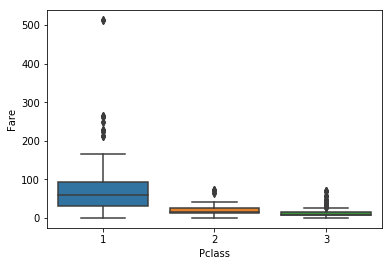

In [254]:
sns.boxplot(x='Pclass',y='Fare',data=train)

In [256]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [257]:
data.Fare = pd.cut(train['Fare'], bins=3)

In [258]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,"(-0.512, 170.776]",S
1,1,1,female,1,0,"(-0.512, 170.776]",C
2,1,3,female,0,0,"(-0.512, 170.776]",S
3,1,1,female,1,0,"(-0.512, 170.776]",S
4,0,3,male,0,0,"(-0.512, 170.776]",S


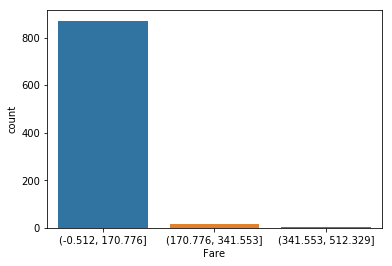

In [255]:
sns.countplot(x='Fare',data=data)

In [260]:
from sklearn.preprocessing import LabelEncoder
t_train=data.apply(LabelEncoder().fit_transform)

In [261]:
t_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,0,2
1,1,0,0,1,0,0,0
2,1,2,0,0,0,0,2
3,1,0,0,1,0,0,2
4,0,2,1,0,0,0,2


In [263]:
X_train = t_train.drop('Survived',axis=1)

In [264]:
y_train=train.Survived

In [265]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null int64
dtypes: int64(6)
memory usage: 41.8 KB


In [267]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [269]:
y_train.shape

(891,)

In [270]:
X_train.shape

(891, 6)

In [271]:
#RandomForest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [273]:
#Logistic Regressor
lg_model=LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [274]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [275]:
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [276]:
test_X=test[X_train.columns]

In [279]:
test_X.apply(LabelEncoder().fit_transform)

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,0,0,24,1
1,2,0,1,0,5,2
2,1,1,0,0,41,1
3,2,1,0,0,34,2
4,2,0,1,1,46,2
5,2,1,0,0,37,2
6,2,0,0,0,14,1
7,1,1,1,1,100,2
8,2,0,0,0,8,0
9,2,1,2,0,89,2


In [280]:
test_X.describe()

,Pclass,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,417.000000
mean,2.265550,0.447368,0.392344,35.627188
std,0.841838,0.896760,0.981429,55.907576
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,0.000000,31.500000
max,3.000000,8.000000,9.000000,512.329200


In [282]:
test_X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S


In [283]:
tests_X=test_X.apply(LabelEncoder().fit_transform)

In [284]:
tests_X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,0,0,24,1
1,2,0,1,0,5,2
2,1,1,0,0,41,1
3,2,1,0,0,34,2
4,2,0,1,1,46,2


In [286]:
rf_predicton = rf_model.predict(tests_X)

In [287]:
lg_prediction = lg_model.predict(tests_X)

In [288]:
rf_predicton.shape

(418,)

In [289]:
lg_prediction.shape

(418,)

In [290]:
my_sub = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': rf_predicton})

In [291]:
my_sub.head()

,PassengerId,Survived
0,892,0.144410
1,893,0.406092
2,894,0.109677
3,895,0.198405
4,896,0.609188


In [293]:
my_sub['Survived'] =my_sub['Survived'].astype(int)

In [294]:
my_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [295]:
if len(my_sub) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(my_sub)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [296]:
suub = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': lg_prediction})

In [297]:
suub['Survived'] =suub['Survived'].astype(int)

In [309]:
suub.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


In [305]:
my_sub[my_sub['Survived']== 1].count()

PassengerId    60
Survived       60
dtype: int64

In [307]:
my_sub.to_csv('submissionrf.csv', index=False)

In [308]:
suub.to_csv('submissionlg.csv', index=False)